In [1]:
using LCIO
using GRUtils
using CxxWrap
using LCIO
using OnlineStats
using Distributions
using BenchmarkTools
using GRUtils

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1260


In [2]:
# print decay chain for 1 event
nParticleList = Int[]
nMuonList = Int[]
muonEnergyList = Float64[]
PDGNumbers = Int[]
GeneratorStatus=Int[]
NonMuonEnergy = Float64[]
parentlist = []
parentlistgstatus = []
LCIO.open("E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio") do reader
    iEvent = 0
    for event in reader
        #println(event)
        iEvent += 1
        iParticle = 0
        iMuon = 0
        
        
        for particle in getCollection(event, "MCParticle")
            iParticle += 1
            parents = [p for p in getParents(particle)[]]
            parentPDG = 0
            if length(parents) > 0
                parentPDG = getPDG(parents[1])
            end
            push!(parentlist,(getPDG(particle),parentPDG))
            push!(parentlistgstatus,(getPDG(particle),parentPDG,getGeneratorStatus(particle)))
            println(iParticle, "\t", getPDG(particle), "\t", parentPDG, "\t", getGeneratorStatus(particle))
            if abs(getPDG(particle)) == 13
                iMuon += 1
                push!(muonEnergyList, getEnergy(particle))
            
            else
                push!(NonMuonEnergy,getEnergy(particle))
            end
            push!(PDGNumbers,abs(getPDG(particle)))
            push!(GeneratorStatus,abs(getGeneratorStatus(particle)))
            
        
            
            
                   
        end
        
    push!(nParticleList, iParticle)
    push!(nMuonList, iMuon)
    break
    end
    
    println("read ", iEvent, " events")
        
end
println(size(nParticleList))
println(nParticleList)
PDGNumbersUniq = unique(PDGNumbers)
GeneratorStatusUniq= unique(GeneratorStatus)

            for x in PDGNumbersUniq
                count=0
                for y in PDGNumbers
                    if x==y
                        count+=1
                    end
                    
                end
                #println(x,",",count)
            end
            for x in GeneratorStatusUniq
                count1=0
                for y in GeneratorStatus
                    if x==y
                        count1+=1
                    end
                    
                end
                println(x,",",count1)
            end
histdata = []
for x in PDGNumbers
    if x<600
        push!(histdata,x)
    end
end
#println(histdata)
#println(parentlist)
#println(parentlistgstatus)
uniplist = unique(parentlist)
uniparentlistgstatus = unique(parentlistgstatus)
            for x in uniplist
                countx=0
                for y in parentlist
                    if x==y
                        countx+=1
                    end
                    
                end
                println("There are $(countx) instances in which $(x[1]) appears with parent $(x[2])")
            end


1	22	0	2
2	22	0	2
3	13	0	2
4	-13	0	2
5	25	0	2
6	22	22	1
7	22	22	1
8	13	13	2
9	-13	-13	2
10	25	25	2
11	94	-13	2
12	13	94	1
13	-13	94	2
14	-13	-13	1
15	22	-13	1
16	5	25	2
17	-5	25	2
18	94	5	2
19	5	94	2
20	-5	94	2
21	5	5	2
22	21	5	2
23	-5	-5	2
24	21	-5	2
25	21	21	2
26	21	21	2
27	5	5	2
28	21	21	2
29	21	21	2
30	21	21	2
31	-5	-5	2
32	92	5	2
33	-523	92	2
34	10213	92	2
35	-213	92	2
36	213	92	2
37	311	92	2
38	-10313	92	2
39	-215	92	2
40	20523	92	2
41	-521	-523	2
42	22	-523	1
43	223	10213	2
44	211	10213	1
45	-211	-213	1
46	111	-213	2
47	211	213	1
48	111	213	2
49	130	311	1
50	-323	-10313	2
51	211	-10313	1
52	-321	-215	1
53	311	-215	2
54	523	20523	2
55	111	20523	2
56	20423	-521	2
57	-20423	-521	2
58	-321	-521	1
59	-211	223	1
60	211	223	1
61	111	223	2
62	22	111	1
63	22	111	1
64	22	111	1
65	22	111	1
66	-321	-323	1
67	111	-323	2
68	130	311	1
69	521	523	2
70	22	523	1
71	22	111	1
72	22	111	1
73	413	20423	2
74	-211	20423	1
75	-413	-20423	2
76	211	-20423	1
77	22	111	1
78	22	111	1
79	22	111	1
80	22	111	1


In [3]:
# simple histograms for whole file
nParticleList = Int[]
nMuonList = Int[]
muonEnergyList = Float64[]
LCIO.open("E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.slcio") do reader
    iEvent = 0
    for event in reader
        iEvent += 1
        iParticle = 0
        iMuon = 0
        for particle in getCollection(event, "MCParticle")
            iParticle += 1
            if abs(getPDG(particle)) == 13
                iMuon += 1
                push!(muonEnergyList, getEnergy(particle))
            end
        end
        push!(nParticleList, iParticle)
        push!(nMuonList, iMuon)
    end
    println("read ", iEvent, " events")
end


read 17143 events


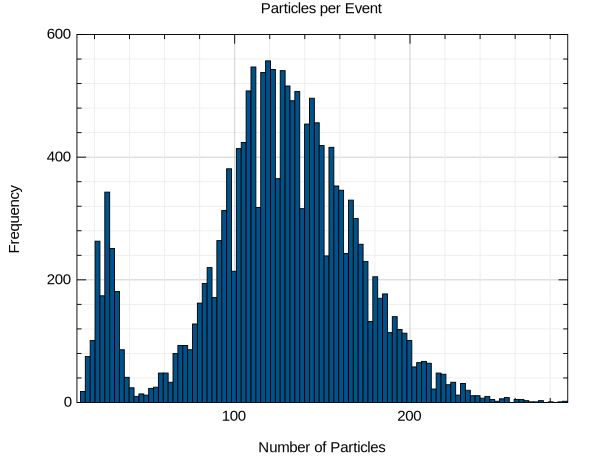

In [8]:
histogram(nParticleList, nbins = 100, title = "Particles per Event",
    xlabel = "Number of Particles", ylabel = "Frequency")

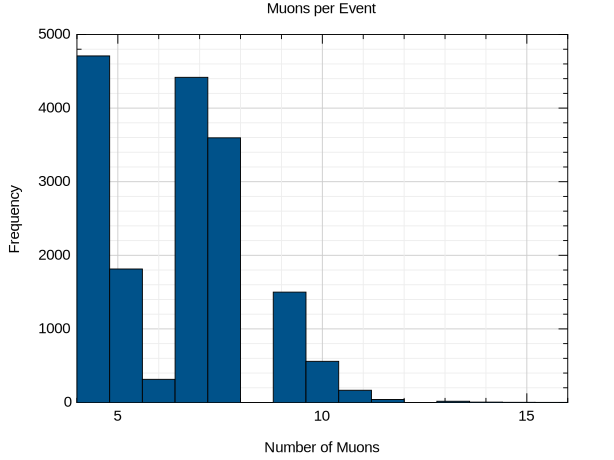

In [5]:
histogram(nMuonList, nbins = 15, title = "Muons per Event", xlabel = "Number of Muons", ylabel = "Frequency")

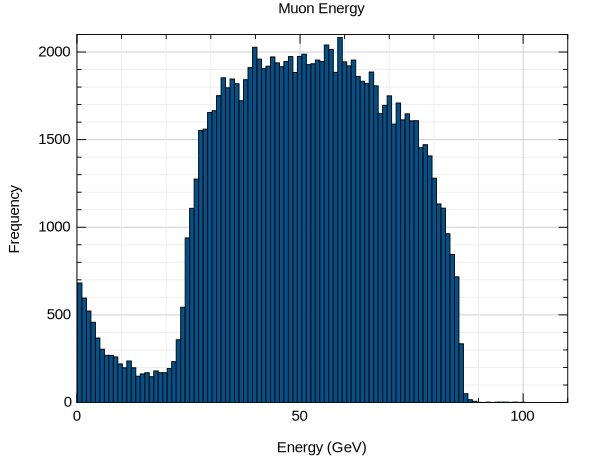

In [6]:
histogram(muonEnergyList, nbins = 100, title = "Muon Energy", xlabel = "Energy (GeV)", ylabel = "Frequency")